A communication network is modeled as a directed graph with $m$ nodes, $n$ edges, and an edge incidence matrix
$A \in \mathbf{R}^{m \times n}$, with $A_{ij} = +1$ if edge $j$ enters node $i$, $-1$ if it exits node $i$, and 0 otherwise.
Edges have latency $l \in \mathbf{R}^n_{+}$ and bandwidth $B \in \mathbf{R}^n_+$.

The network is shared by $r$ agents. Agent $i$ wants to transmit as much bandwidth as possible between source and sink nodes $s_i$ and $t_i$. To do this, agents send flows $F \in \mathbf{R}^{n \times r}_+$ along the edges.

Let $f_i \in \mathbf{R}^n_+$ (corresponding to the $i$th column of $F$) be the flow of agent $i$. Flows must obey the conservation equations $A f_i = u_i(e_{t_i} - e_{s_i})$,
where $e_i \in \mathbf{R}^m$ is the standard basis vector whose $i$th element is $1$. The total bandwidth (throughput) sent into the sink node $t_i$ by agent $i$ is $u_i$.

As the network is shared, the flow from each agent over a single edge cannot exceed that edge's maximum bandwidth: $\sum f_i \leq B$.

The *average latency* of flow $f_i$ is given by $(l^T f_i)/u_i$.
Agent $i$ will tolerate a maximum average latency $L_i$, resulting in the constraint $l^T f_i \leq u_i L_i$.
If the network is such that no flow exists with average latency at most $L_i$, the flow just doesn't happen: $u_i = 0$ and $f_i = 0$.

In order to allocate bandwidth to the agents in a way that accounts for their competing interests in limited resources, we formulate a market equilibrium problem.
Our goal will be to find prices $p \in \mathbf{R}^n_+$ for the bandwidth so that the market is at equilibrium. That is, agents purchasing bandwidth at prices $p$ to maximize their throughput $u$ won't overload any edge in the network with more bandwidth than it can handle.

Agent $i$ is given some amount of cash $w_i$ with which to purchase bandwidth $f_i$. Acting optimally, an agent will use all of the bandwidth she purchases, so we can equate the flow and bandwidth.
The cost the agent must pay is given by $p^T f_i$, so she is constrained by $p^T f_i \leq w_i$.

As stated, we have a Fisher equilibrium problem. Agent $i$'s utility function over $f_i \geq 0$ is given by

\begin{array}{lll}
  U_i(f_i) = &\mbox{maximize} & u_i \\
  &\mbox{subject to} & A f_i = u_i(e_{t_i} - e_{s_i})\\
  && l^T f_i \leq u_i L_i.
\end{array}

Note that $U_i$ is concave, increasing, and homogeneous of degree 1, which is what we need for the Fisher framework.

Given prices $p$, agent $i$ will solve the optimizaiton problem

\begin{array}{ll}
  \mbox{maximize} & U_i(f_i) \\
  \mbox{subject to} & p^T f_i \leq w_i \\
  & f_i \geq 0.
\end{array}

To find bandwidth allocations (and prices) which solve each agent's optimization problem and respect the total bandwidth constraints, we formulate and solve the Fisher equilibrium problem

\begin{array}{ll}
  \mbox{maximize} & \sum_i w_i\log U_i(f_i) \\
  \mbox{subject to} & \sum_i f_i \leq B\\
  & f_i \geq 0,
\end{array}

which we can rewrite as

\begin{array}{ll}
  \mbox{maximize} & \sum_i w_i\log u_i \\
  \mbox{subject to} & A f_i = u_i(e_{t_i} - e_{s_i})\\
  & l^T f_i \leq u_i L_i\\
  & \sum_i f_i \leq B \\
  & f_i \geq 0.
\end{array}

In [2]:
import networkx as nx
import numpy as np
%matplotlib inline

import toolz.itertoolz as it

def rand_pairs(n):
    while True:
        a = np.random.randint(n)
        b = np.random.randint(n)
        if a != b:
            yield a, b

In [23]:
k = 3
G = nx.grid_2d_graph(k,k)
G = G.to_directed()

A = nx.incidence_matrix(G, oriented=True).todense()
n,m = A.shape #n nodes, m edges

r = np.random.rand(m)+1 ## time it takes to cross edge
C = np.random.rand(m)+1 ## edge bandwidth capacity

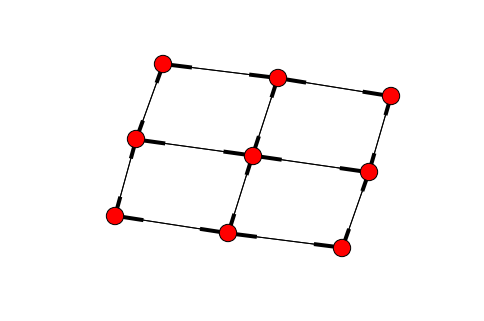

In [24]:
nx.draw_graphviz(G)

In [35]:
l = 4 #agents
a = np.random.randint(n,size=l)

a, b = map(np.array,zip(*it.take(l, rand_pairs(n))))
T = np.random.rand(l)+3
w = np.random.rand(l)+1

B = np.zeros((n,l))
B[b,range(l)] = 1
B[a,range(l)] = -1

In [36]:
r

array([ 1.75740055,  1.46451073,  1.23872564,  1.79793189,  1.39088259,
        1.06393559,  1.8068478 ,  1.61624449,  1.12195287,  1.4741859 ,
        1.70784282,  1.13567165,  1.26952778,  1.0272171 ,  1.75244179,
        1.59336234,  1.75426078,  1.54087719,  1.81491177,  1.00375345,
        1.59254347,  1.87649305,  1.5086031 ,  1.89645019])

In [37]:
A

matrix([[-1., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0.,
          0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., -1., -1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         -1., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.

In [41]:
Told = T
T = T + 20

In [42]:
import cvxpy as cvx
F = cvx.Variable(m,l)
t = cvx.Variable(l)

constr = [A*F == B*cvx.diag(t),
F >= 0,
sum(F[:,i] for i in range(l)) <= C,
F.T*r <= cvx.mul_elemwise(T,t)]

obj = cvx.Maximize(cvx.log(t).T*w)

p = cvx.Problem(obj, constr)

In [43]:
p.solve(verbose=True, solver='SCS', max_iters=100000, eps=1e-5)
print p.status, p.value

----------------------------------------------------------------------------
	SCS v1.0.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 500
eps = 1.00e-05, alpha = 1.50, max_iters = 100000, normalize = 1, scale = 5.00
Variables n = 104, constraints m = 172
Cones:	primal zero / dual free vars: 36
	linear vars: 124
	exp vars: 12, dual exp vars: 0
Setup time: 1.69e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  1.49e-03 
   100| 1.23e-03  4.89e-03  6.46e-04 -2.48e+00 -2.49e+00  2.11e-16  1.04e-02 
   200| 6.55e-05  1.38e-04  9.81e-06 -2.49e+00 -2.49e+00  2.11e-16  2.61e-02 
   300| 3.52e-06  3.97e-0

optimal_inaccurate -29.6928756614


In [21]:
t.value

matrix([[ 1.80229199],
        [ 1.81134185],
        [ 1.68583445],
        [ 3.19058458]])

In [44]:
F.value[:,0]

matrix([[  2.88536661e-02],
        [  9.36593509e-02],
        [  1.03513778e+00],
        [ -5.20117978e-07],
        [ -6.42484769e-07],
        [  2.84016620e-01],
        [  1.15765163e+00],
        [  1.90362466e-01],
        [  1.67540227e-01],
        [  2.36699708e-01],
        [  1.75023868e-01],
        [ -1.62790827e-06],
        [  5.77804696e-07],
        [  1.19733255e-01],
        [  2.66488698e-01],
        [  1.30923404e-01],
        [  4.41000583e-02],
        [  2.18683230e-01],
        [  6.43043415e-07],
        [  1.37574899e-01],
        [ -5.85625174e-08],
        [  1.53089729e-01],
        [  4.61658635e-02],
        [  2.68676255e-01]])

In [12]:
F.value[F.value < 1e-5] = 0

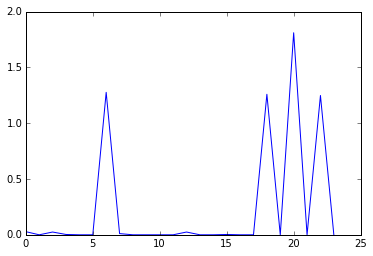

In [38]:
import matplotlib.pyplot as plt
plt.plot(F.value[:,3])

In [41]:
sum(F.value[:,i] for i in range(l)), C

(matrix([[ 0.08717658],
         [ 0.01458149],
         [ 0.49941013],
         [ 1.68751991],
         [ 0.28410896],
         [ 1.19176593],
         [ 1.5511281 ],
         [ 0.04128119],
         [ 0.        ],
         [ 1.35377948],
         [ 1.32969694],
         [ 0.2708283 ],
         [ 0.15212218],
         [ 1.30208849],
         [ 1.55809321],
         [ 1.53276266],
         [ 0.        ],
         [ 0.        ],
         [ 1.5052327 ],
         [ 1.28417144],
         [ 1.95680235],
         [ 1.35980384],
         [ 1.44603447],
         [ 1.1253832 ]]),
 array([ 1.36156181,  1.89236951,  1.0388589 ,  1.89423057,  1.47317537,
         1.19176593,  1.8904404 ,  1.50781248,  1.19120331,  1.35377949,
         1.32969694,  1.72413452,  1.81665947,  1.30208849,  1.55809321,
         1.69798238,  1.74219331,  1.95978256,  1.57715317,  1.29699905,
         1.95680235,  1.35980384,  1.44603447,  1.44900113]))